In [65]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Binary Classification

### 1.1 Titanic, but correctly this time

Take your linear regression model from the workshop 3.3 on the titanic dataset.

Swap OLS for logistic regresssion and compare the classification model metrics (accuracy, ROC plot, F1, precision/recall).

How much better is logistic regression than OLS on binary data?

In [50]:
#load basic packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load regression libraries
import statsmodels.api as sm
import numpy as np


from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, r2_score, classification_report, plot_confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

df = sns.load_dataset('titanic')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
#check all column names again
list(df.columns)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [39]:
#drop those which won't tell me much
df.drop(['parch','embarked','class', 'who', 'deck', 'alive'], axis=1, inplace=True)

#drop NaN values and reset index
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)


In [40]:
df.head()

,survived,pclass,sex,age,sibsp,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,7.2500,True,Southampton,False
1,1,1,female,38.0,1,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,53.1000,False,Southampton,False
4,0,3,male,35.0,0,8.0500,True,Southampton,True


In [41]:
df.shape

(712, 9)

In [42]:
#create pipeline

cat_col = ['pclass', 'sex', 'sibsp', 'adult_male', 'embark_town', 'alone']

X = df[['age', 'fare']].copy()

for n in ['age', 'fare']:
    X[n+'2'] = X[n] ** 2

for c in cat_col:
  X = X.join(pd.get_dummies(df[c], drop_first=True, prefix=c))

y = df.survived

X

,age,fare,age2,fare2,pclass_2,pclass_3,sex_male,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,adult_male_True,embark_town_Queenstown,embark_town_Southampton,alone_True
0,22.0,7.2500,484.0,52.562500,0,1,1,1,0,0,0,0,1,0,1,0
1,38.0,71.2833,1444.0,5081.308859,0,0,0,1,0,0,0,0,0,0,0,0
2,26.0,7.9250,676.0,62.805625,0,1,0,0,0,0,0,0,0,0,1,1
3,35.0,53.1000,1225.0,2819.610000,0,0,0,1,0,0,0,0,0,0,1,0
4,35.0,8.0500,1225.0,64.802500,0,1,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,39.0,29.1250,1521.0,848.265625,0,1,0,0,0,0,0,0,0,1,0,0
708,27.0,13.0000,729.0,169.000000,1,0,1,0,0,0,0,0,1,0,1,1
709,19.0,30.0000,361.0,900.000000,0,0,0,0,0,0,0,0,0,0,1,1
710,26.0,30.0000,676.0,900.000000,0,0,1,0,0,0,0,0,1,0,0,1


use statsmodel to run linear regression in this exercise

In [44]:
est = sm.OLS(y,sm.add_constant(X)).fit(cov_type ='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     99.89
Date:                Tue, 25 May 2021   Prob (F-statistic):          7.22e-168
Time:                        05:08:42   Log-Likelihood:                -292.03
No. Observations:                 712   AIC:                             618.1
Df Residuals:                     695   BIC:                             695.7
Df Model:                          16                                         
Covariance Type:                  HC2                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.1560      0.103     11.271      0.000       0.955       1.357
age                        -0.0025      0.004     -0.573      0.566      -0.011       0.006
fare                       -0.0011      0.001     -1.182      0.237      -0.003       0.001
age2                    -1.592e-05   6.04e-05     -0.264      0.792      -0.000       0.000
fare2                    3.198e-06   1.92e-06      1.665      0.096   -5.68e-07    6.96e-06
pclass_2                   -0.2240      0.055     -4.097      0.000      -0.331      -0.117
pclass_3                   -0.3888      0.062     -6.226      0.000      -0.511      -0.266
sex_male                    0.0164      0.081      0.203      0.839      -0.142       0.175
sibsp_1                    -0.0128      0.050     -0.255      0.798      -0.111       0.085
sibsp_2                    -0.0419      0.076     -0.550      0.582      -0.191       0.107
sibsp_3                    -0.3764      0.136     -2.774      0.006      -0.642      -0.110
sibsp_4                    -0.4605      0.116     -3.962      0.000      -0.688      -0.233
sibsp_5                    -0.6553      0.069     -9.522      0.000      -0.790      -0.520
adult_male_True            -0.5735      0.087     -6.615      0.000      -0.743      -0.404
embark_town_Queenstown     -0.1230      0.083     -1.476      0.140      -0.286       0.040
embark_town_Southampton    -0.0547      0.041     -1.321      0.187      -0.136       0.026
alone_True                  0.0180      0.049      0.366      0.714      -0.078       0.114
==============================================================================
Omnibus:                       34.123   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.101
Skew:                           0.505   Prob(JB):                     3.23e-09
Kurtosis:                       3.546   Cond. No.                     2.69e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 2.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

run logistic regression as well

In [56]:
log_mod = sm.Logit(y,sm.add_constant(X)).fit()
log_mod.summary()

         Current function value: 0.415903
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                           16
Date:                Tue, 25 May 2021   Pseudo R-squ.:                  0.3837
Time:                        05:22:40   Log-Likelihood:                -296.12
converged:                      False   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.320e-68
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       4.0066      0.754      5.314      0.000       2.529       5.484
age                        -0.0159      0.029     -0.541      0.588      -0.074       0.042
fare                       -0.0064      0.007     -0.868      0.386      -0.021       0.008
age2                       -0.0002      0.000     -0.385      0.700      -0.001       0.001
fare2                    2.212e-05   2.05e-05      1.077      0.281   -1.81e-05    6.24e-05
pclass_2                   -1.5022      0.386     -3.896      0.000      -2.258      -0.746
pclass_3                   -2.6399      0.418     -6.309      0.000      -3.460      -1.820
sex_male                    0.1240      0.587      0.211      0.833      -1.027       1.275
sibsp_1                    -0.0201      0.376     -0.053      0.957      -0.757       0.717
sibsp_2                    -0.2679      0.654     -0.409      0.682      -1.550       1.015
sibsp_3                    -1.8691      0.775     -2.413      0.016      -3.388      -0.351
sibsp_4                    -2.2058      0.789     -2.796      0.005      -3.752      -0.660
sibsp_5                   -32.0512   2.92e+06   -1.1e-05      1.000   -5.73e+06    5.73e+06
adult_male_True            -3.2039      0.630     -5.084      0.000      -4.439      -1.969
embark_town_Queenstown     -0.9374      0.603     -1.555      0.120      -2.119       0.244
embark_town_Southampton    -0.3773      0.287     -1.314      0.189      -0.940       0.185
alone_True                  0.2424      0.389      0.624      0.533      -0.519       1.004
===========================================================================================
"""

which one is best? logistic, but just by 2%

In [51]:
r2_score(y, est.fittedvalues)
#same as R-squared in the first model

0.4479480024586985

In [59]:
r2_score(y,log_mod.predict(sm.add_constant(X)))

0.46778403054768747

# 2. Intro To Computer Vision

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is a classic in computer vision. It's a database of manually written digits (from 0 to 9) scanned into a 28x28 pixel image.

The `X` matrix is 784 numbers (28x28) with numbers saying how dark the pixel is. The `y` variable is the number. The task is to use the images to do optical recognition.

You can fetch the dataset with the following command:

```
from sklearn.datasets import fetch_openml
fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
```

Use sklearn's logistic regression and any of the tricks you want to boost predictive accuracy. Here's a few notes:

- Use the sklearn `train_test_split` we saw in class to keep some holdout data to test on.

- You can use whatever sklearn preprocessing you think is relevant. Here's a few: 
```
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
```

- Since there's many features (especially if you use data augmentation like polynomial features), this is a good time to use regularization. Try to find the best regularization parameters possible.

- You should be able to get at least 80% on a test set size of 10_000

In [66]:
#load packages

#for data handling and dataframe
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

# to standardize data
from sklearn.preprocessing import StandardScaler

# for Cross validation and Grid Searching
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
# metrics to evaluate models
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [67]:
#load MNIST data from sklearn
from sklearn.datasets import fetch_openml

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.keys()
scaler= StandardScaler()

#break data into independent and target variables
X,y=mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


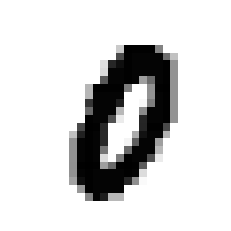

In [69]:
#check out an image
randDigit = X[34]

randDigitImage = randDigit.reshape(28,28)
plt.imshow(randDigitImage, cmap=mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [70]:
#see label to verify if it matches
y[34]

'0'

In [71]:
#OK, both X (dependent) and y (target) havve been correctly imported
#now convert y string labels into integers
y=y.astype(np.uint8)

In [72]:
#prepare Training and testing sets
#Using a 70/30 training ratio to start to see how performance will work out

In [73]:
#randDigits=np.array([randDigit,randDigit2])

In [74]:
#load sklearn train test split modules
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

X,y=mnist['data'], mnist['target']

#train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
#scaler = preprocessing.StandardScaler().fit(X_train)

model=LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
X_train.shape

(59500, 784)

In [77]:
y_train.shape

(59500,)

In [78]:
model.predict(X_test)

array(['8', '4', '5', ..., '2', '4', '4'], dtype=object)

In [80]:
y_pred=model.predict(X_test)

In [81]:
y_test

array(['8', '4', '8', ..., '2', '4', '4'], dtype=object)

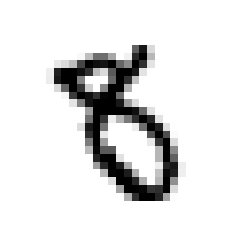

In [82]:
#check out an image
randDigit = X_test[2]

randDigitImage = randDigit.reshape(28,28)
plt.imshow(randDigitImage, cmap=mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

#goal of >80% accuracy achieved

0.9204761904761904

# 3. Counting Poissons

The `data/fish.csv` is a data set of camping trips taken by 250 groups of people.

- The campers may or may not have done some fishing during their trip.
- If a group did some fishing, they would have caught zero or mor fish.
- We want to estimate not only how many fish were caught (if there was fishing done by a camping group), but also the probability that the camping group caught any fish at all.

Here's info on the columns:

**FISH_COUNT:** The number of fish that were caught. This will be our dependent variable y.

**LIVE_BAIT:** A binary variable indicating whether live bait was used.

**CAMPER:** Whether the fishing group used a camper van.

**PERSONS:** Total number of people in the fishing group. Note that in some groups, none of them may have fished.

**CHILDREN:** The number of children in the camping group.

Your task is to predict the number of fish caught (FISH_COUNT) by a camping group based on the values of LIVE_BAIT, CAMPER, PERSONS and CHILDREN variables.

Use what we learned on count variables and zero-inflated datasets to achieve the best model you can.

Interpret the models you used to give an analysis of each feature's effect on the predicted fish caught.

**N.B.** Please appreciate the effort I went through to find a fish dataset for a count problem pun.

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_ceres_residuals
sns.set()

#load data
df=pd.read_csv("/content/drive/MyDrive/3-7-glm/data/fish.csv")
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LIVE_BAIT   250 non-null    int64
 1   CAMPER      250 non-null    int64
 2   PERSONS     250 non-null    int64
 3   CHILDREN    250 non-null    int64
 4   FISH_COUNT  250 non-null    int64
dtypes: int64(5)
memory usage: 9.9 KB


,LIVE_BAIT,CAMPER,PERSONS,CHILDREN,FISH_COUNT
0,0,0,1,0,0
1,1,1,1,0,0
2,1,0,1,0,0
3,1,1,2,1,0
4,1,0,1,0,1
5,1,1,4,2,0
6,1,0,3,1,0
7,1,0,4,3,0
8,0,1,3,2,0
9,1,1,1,0,1


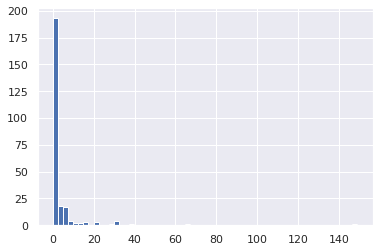

In [89]:
y = df['FISH_COUNT']
y.hist(bins = 60)

In [92]:
model_linear = smf.ols('FISH_COUNT ~ LIVE_BAIT + CAMPER + PERSONS + CHILDREN', data=df).fit()
print(model_linear.summary())

#using this model and no pre-processing, the R2 value are exremely low (19%).

                            OLS Regression Results                            
Dep. Variable:             FISH_COUNT   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     14.86
Date:                Tue, 25 May 2021   Prob (F-statistic):           6.96e-11
Time:                        05:38:59   Log-Likelihood:                -940.59
No. Observations:                 250   AIC:                             1891.
Df Residuals:                     245   BIC:                             1909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1847      2.508     -3.662      0.0

In [110]:
#adding a constant and using the Poison method
y = df['FISH_COUNT']
X = sm.add_constant(df.drop(columns=['FISH_COUNT']))

est = sm.ZeroInflatedPoisson(y, X, exog_infl=X,
      inflation='logit').fit(maxiter=10_000, tol=0.0001, cov_type='HC2')
est.summary()

Optimization terminated successfully.
         Current function value: 2.849644
         Iterations: 44
         Function evaluations: 46
         Gradient evaluations: 46


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:              FISH_COUNT   No. Observations:                  250
Model:             ZeroInflatedPoisson   Df Residuals:                      245
Method:                            MLE   Df Model:                            4
Date:                 Tue, 25 May 2021   Pseudo R-squ.:                  0.3679
Time:                         05:50:55   Log-Likelihood:                -712.41
converged:                        True   LL-Null:                       -1127.0
Covariance Type:                   HC2   LLR p-value:                3.589e-178
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_const         0.8334      1.138      0.732      0.464      -1.397       3.064
inflate_LIVE_BAIT     0.7412      1.048      0.707      0.480      -1.314       2.796
inflate_CAMPER       -0.8717      0.373     -2.337      0.019      -1.603      -0.141
inflate_PERSONS      -0.9312      0.193     -4.825      0.000      -1.309      -0.553
inflate_CHILDREN      1.9586      0.313      6.255      0.000       1.345       2.572
const                -2.4521      0.691     -3.547      0.000      -3.807      -1.097
LIVE_BAIT             1.8189      0.375      4.851      0.000       1.084       2.554
CAMPER                0.5971      0.372      1.604      0.109      -0.132       1.326
PERSONS               0.8364      0.165      5.068      0.000       0.513       1.160
CHILDREN             -1.1806      0.354     -3.338      0.001      -1.874      -0.487
=====================================================================================
"""

# 5. Survival Question

The `data/telco_churn.csv` dataset comes from [here](https://www.kaggle.com/blastchar/telco-customer-churn) and here is the description:

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


**5.1 StreamingTV churn**

The `Tenure` column is how long the customer lasted. Make the survival curve for both the group using StreamingTV and the one not using it in the dataset

![](streamingtv.png)


**5.2 Survival Regression**

Use either lifelines or statsmodels to implement a survival regression model predicting tenure. Don't forget to use the churn column as the event column.

In [158]:
pip install lifelines

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import numpy as np

from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter

df = pd.read_csv("/content/drive/MyDrive/3-7-glm/data/telco_churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [164]:
#check data types: mostly strings, and some values saved as strings as well
#OHE will be required, some conversions of yes/no to boolean (ex: StreamingTV)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [165]:
df.shape

(7043, 21)

In [166]:
#data type conversions

#drop unecessary columns
df1 = df.drop(columns=['customerID', 'SeniorCitizen','Partner', 'Dependents', 'MultipleLines','OnlineSecurity',
                 'OnlineBackup',	'DeviceProtection',	'TechSupport', 'PaperlessBilling','MonthlyCharges'])

#convert charges to int values
df1['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

#convert yes/no answers to 0/1
df1['Churn'] = df['Churn'].apply(lambda x: 1 if x== 'Yes' else 0)




In [167]:
#count na values
df1.isna().sum(axis=0)

gender              0
tenure              0
PhoneService        0
InternetService     0
StreamingTV         0
StreamingMovies     0
Contract            0
PaymentMethod       0
TotalCharges       11
Churn               0
dtype: int64

In [168]:
#replace null TotalCharges values with median
df1.TotalCharges.fillna(value=df1['TotalCharges'].median(), inplace = True)

In [169]:
df1.head(10)

,gender,tenure,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,PaymentMethod,TotalCharges,Churn
0,Female,1,No,DSL,No,No,Month-to-month,Electronic check,29.85,0
1,Male,34,Yes,DSL,No,No,One year,Mailed check,1889.50,0
2,Male,2,Yes,DSL,No,No,Month-to-month,Mailed check,108.15,1
3,Male,45,No,DSL,No,No,One year,Bank transfer (automatic),1840.75,0
4,Female,2,Yes,Fiber optic,No,No,Month-to-month,Electronic check,151.65,1
5,Female,8,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,820.50,1
6,Male,22,Yes,Fiber optic,Yes,No,Month-to-month,Credit card (automatic),1949.40,0
7,Female,10,No,DSL,No,No,Month-to-month,Mailed check,301.90,0
8,Female,28,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,3046.05,1
9,Male,62,Yes,DSL,No,No,One year,Bank transfer (automatic),3487.95,0


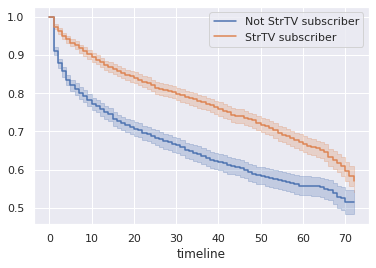

In [170]:
#create a class with KaplanMeier

kmf1 = KaplanMeierFitter()

T = df1['tenure']
E = df1['Churn']

#compare streamingTV and non-StreamingTV customer churn
groups = df1['StreamingTV']
ins1 = (groups == 'No')
ins2 = (groups == 'Yes')

#fit model from non-subscribers
kmf1.fit(T[ins1], E[ins1], label = 'Not StrTV subscriber')
a1 = kmf1.plot()

#fit model for subscribers
kmf1.fit(T[ins2], E[ins2], label='StrTV subscriber')
kmf1.plot(ax=a1)

In [185]:
import pandas as pd
from lifelines import CoxPHFitter

df_r = df1.loc[:,['gender','tenure', 'InternetService','Contract', 'PaymentMethod', 'TotalCharges', 'Churn']]

#OHE columns
df_OHE = pd.get_dummies(df_r, drop_first=True)
df_OHE.head()
               
#Applying Cox proportional hazard model
cph = CoxPHFitter()
cph.fit(df_OHE, 'tenure', event_col='Churn')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12813.75
         time fit was run = 2021-05-25 07:12:55 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
gender_Male                            -0.06       0.94       0.05            -0.15             0.03                 0.86                 1.03
InternetService_Fiber optic             1.82       6.16       0.07             1.69             1.95                 5.40                 7.03
InternetService_No                     -2.10       0.12       0.13            -2.36            -1.85                 0.09                 0.16
Contract_One year                      -1.24       0.29       0.10            -1.43            -1.05                 0.24                 0.35
Contract_Two year                      -3.63       0.03       0.20            -4.01            -3.24                 0.02                 0.04
PaymentMethod_Credit card (automatic)  -0.00       1.00       0.09            -0.18             0.17                 0.83                 1.19
PaymentMethod_Electronic check          0.50       1.64       0.07             0.36             0.64                 1.43                 1.89
PaymentMethod_Mailed check              0.52       1.68       0.09             0.35             0.69                 1.42                 2.00

                                           z      p   -log2(p)
covariate                                                     
TotalCharges                          -41.43 <0.005        inf
gender_Male                            -1.30   0.19       2.37
InternetService_Fiber optic            26.99 <0.005     530.52
InternetService_No                    -16.11 <0.005     191.66
Contract_One year                     -12.68 <0.005     120.05
Contract_Two year                     -18.43 <0.005     249.63
PaymentMethod_Credit card (automatic)  -0.04   0.97       0.04
PaymentMethod_Electronic check          6.89 <0.005      37.40
PaymentMethod_Mailed check              6.02 <0.005      29.11
---
Concordance = 0.93
Partial AIC = 25645.51
log-likelihood ratio test = 5678.57 on 9 df
-log2(p) of ll-ratio test = inf

In [ ]:
#This is pretty cool: customers are more likely to churn if they have
#Fiber Optic Internet, as well as a one rather than 2-yr internet contract
#with the same ISP, and if they don't have some form of direct debit payment.